# Disciplina de Machine Learning Modelos Supervisionados Modernos
# Marcelo Santos da Silva
## Trabalho 3 - SVM

## Spaceship Titanic
https://www.kaggle.com/competitions/spaceship-titanic/







### Para criar o modelo, vamos seguir as etapas:
#### 1. Preparação dos dados
#### 2. Análise dos dados
#### 3. Preprocessamento dos dados
#### 4. Desenvolvimento do modelo de machine learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

## Etapa 1 - Preparação os dados

O arquivo disponibilizado como "teste" (test.csv) não será utilizado.

O teste em si será gerado a partir do arquivo de "treino" (train.csv).

In [3]:
#Criando dataset para o arquivo de trabalho (treino)
train=pd.read_csv('../data/train.csv')

In [4]:
# Visualizando os dados de treino
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Descrição das Features / Atributos:

* __PassengerId__: ID do passageiro.
* __HomePlanet__: Planeta de origem do passageiro.
* __CryoSleep__: Indica se o passageiro viajou em animação suspensa.
* __Cabin__: Número da cabine.
* __Destination__: Planeta de destino.
* __Age__: Idade do passageiro.
* __VIP__: Indica se o passageiro pagou pelo tratamento VIP.
* __RoomService__: Total pago pelo serviço de quarto.
* __FoodCourt__: Total pago na praça de alimentação.
* __ShoppingMall__: Total pago no centro de compras.
* __Spa__: Total pago no spa.
* __VRDeck__: Total pago em realidade virtual.
* __Name__: Nome do passageiro.
* __Transported__: Target. Variável a ser predita. Indica se o passageiro foi transportado para outra dimensão.



### 1.1 - Informações dos Dados

In [5]:
# Verificando tamanho do dataset (linhas e colunas)
print('trian_shape:',train.shape)

trian_shape: (8693, 14)


In [6]:
#Analisando informações básicas do dataset de treino
train.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [7]:
# Describe do treino
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Interessante observar:
- até 50% das pessoas não realizou nenhum gasto com os serviços disponíveis.
- comparando-se o max de cada um com seus respectivos 50%/75%, pode-se verificar a presença de outliers nos serviços disponíveis.

## Etapa 2 - Análise dos dados

### 2.1 - Análise da variável target (Transported)

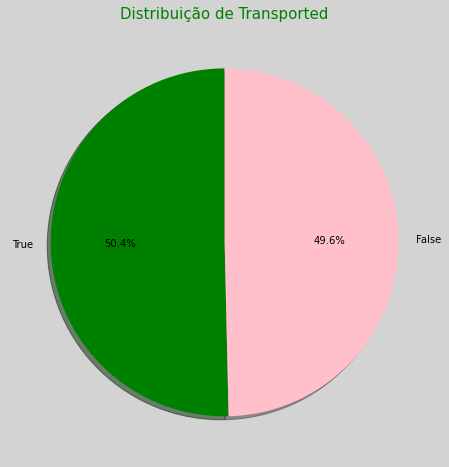

In [8]:
# Análise do balancemanto da variável target
labels = train["Transported"].value_counts().index
sizes = train["Transported"].value_counts()
colors = ['green','pink']
fig = plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
plt.title('Distribuição de Transported', color = 'green', fontsize = 15)
fig.set_facecolor('lightgrey')
plt.show()


### Nesse gráfico, podemos verificar que o target está *balanceado*. Ou seja, existe uma distribuição simétrica de todos os possíves valores no conjunto de dados. 
### Portanto, podemos usar a *Precisão* como métrica para avaliação.


### 2.2 - Distribuição dos atributos categóricos


In [9]:
# Listagem das variáveis categóricas
cat_columns=['HomePlanet','CryoSleep','Destination','VIP']

#Muda as variáveis booleanas para Y/N a fim de facilitar a montagem dos gráficos abaixo
train_temp = train.replace({False: 'N', True: 'Y'})
train_temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,N,B/0/P,TRAPPIST-1e,39.0,N,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,N
1,0002_01,Earth,N,F/0/S,TRAPPIST-1e,24.0,N,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Y
2,0003_01,Europa,N,A/0/S,TRAPPIST-1e,58.0,Y,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,N
3,0003_02,Europa,N,A/0/S,TRAPPIST-1e,33.0,N,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,N
4,0004_01,Earth,N,F/1/S,TRAPPIST-1e,16.0,N,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,N,A/98/P,55 Cancri e,41.0,Y,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,N
8689,9278_01,Earth,Y,G/1499/S,PSO J318.5-22,18.0,N,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,N
8690,9279_01,Earth,N,G/1500/S,TRAPPIST-1e,26.0,N,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,Y
8691,9280_01,Europa,N,E/608/S,55 Cancri e,32.0,N,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,N


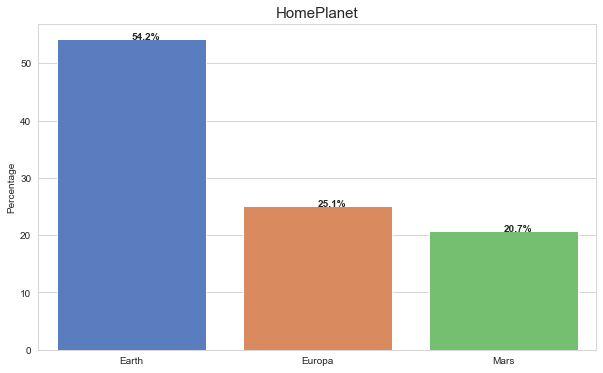

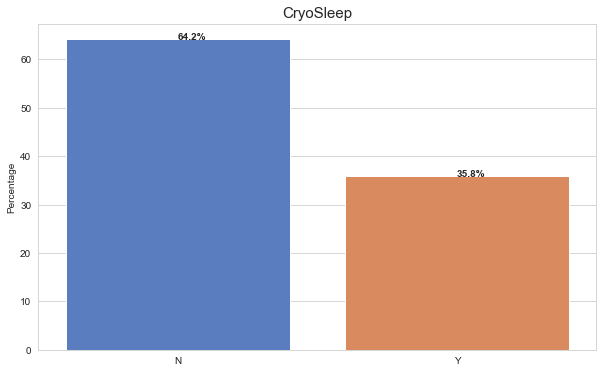

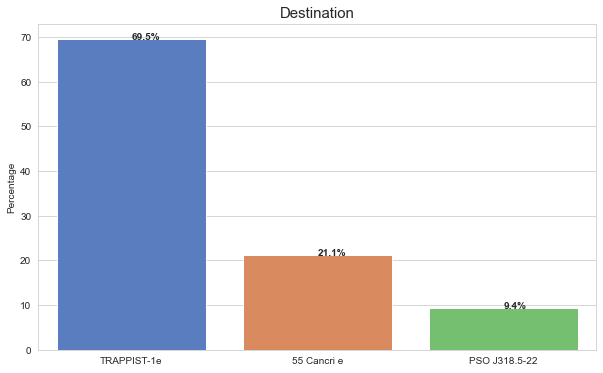

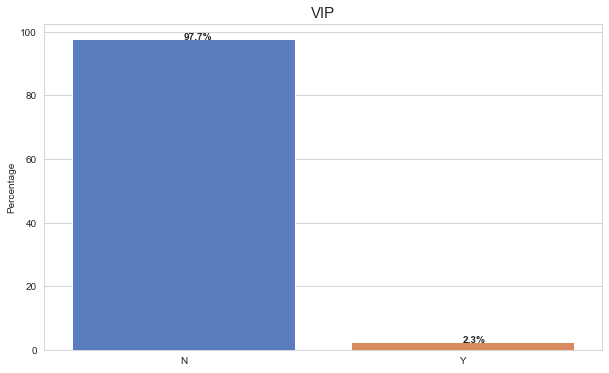

In [10]:
colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
for i,c in enumerate(cat_columns):
    df_per = pd.concat([train_temp[c].value_counts(), train_temp[c].value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
    df_per.replace({False: 'F'}, inplace=True)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=df_per.index, y='percentage', data=df_per, ci=None, palette="muted",orient='v')
    ax.set_title(c, fontsize=15)
    ax.set_ylabel ("Percentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )


#### Analisando as features:
* Home Planet - majoritariamente, os passageiros são originados da Terra (Earth)
* CryoSleep - a grande maioria não estava em câmaras criogênicas
* Destination - majoritariamente, os passageiros estavam a caminho do planeta TRAPPIST-1e
* VIP - um percentual muito pequeno (2,3%) está na categoria VIP

### 2.3 - Análise Exploratória para as features numéricas


In [11]:
num_columns=['Age','RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck']

### 2.3.1 - Análise em relação à variável target

In [12]:
train.groupby(by='Transported').agg('mean')[num_columns]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


Analisando-se a média das variáveis numéricas "contra" a variável target Transported:
- há uma grande discrepância nos gastos com RoomService, Spa e VRDeck, serviços que podemos que sejam usufruidos pelos passageiros de renda mais alta. Os gastores maiores estão entre os não transportados.
- nos serviços de FoodCourt e ShoppingMall há maior equilíbrio. Interessante notar que esse tipo de serviço é de usufruto mais comum entre os passageiros, independentemente da renda.
- considerando a idade, a discrepância também não é grande.

### 2.3.2 - Análise individual

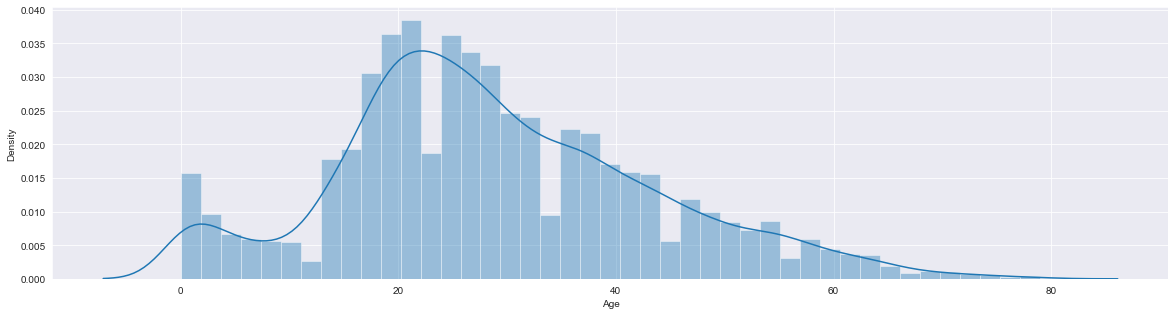

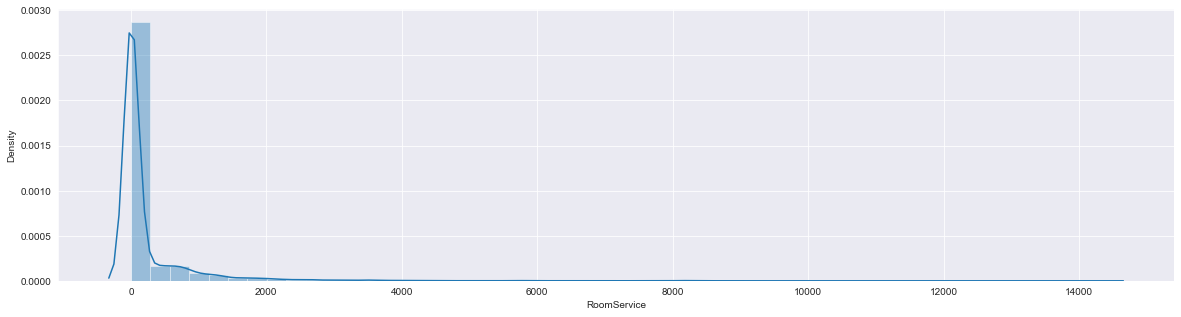

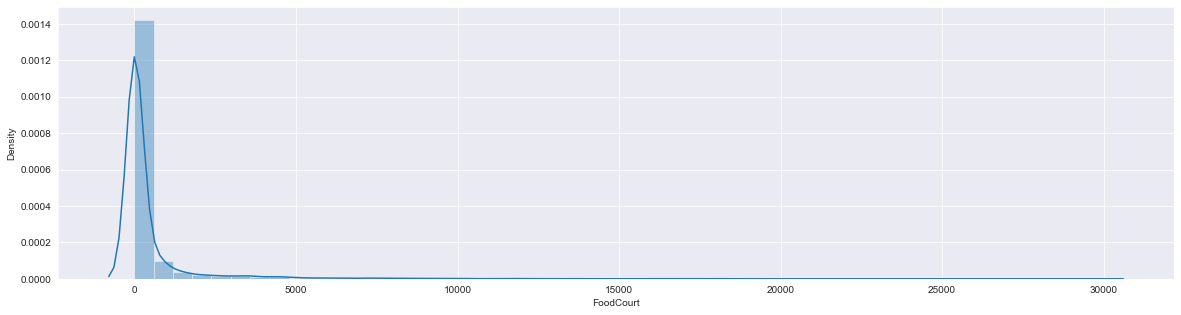

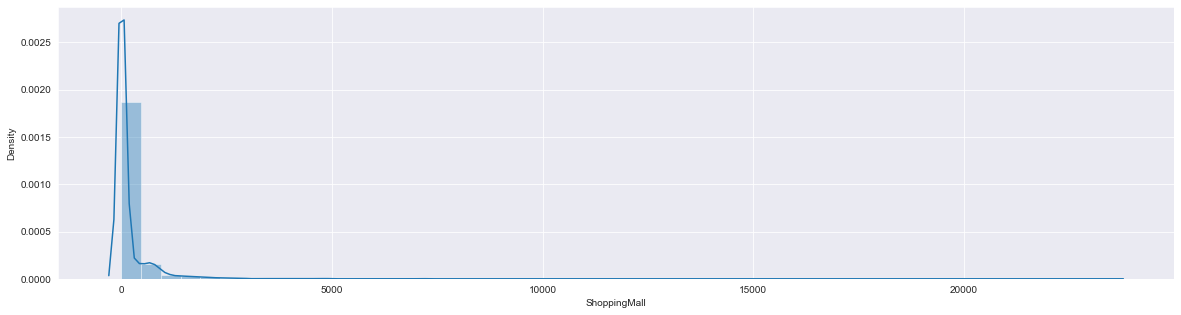

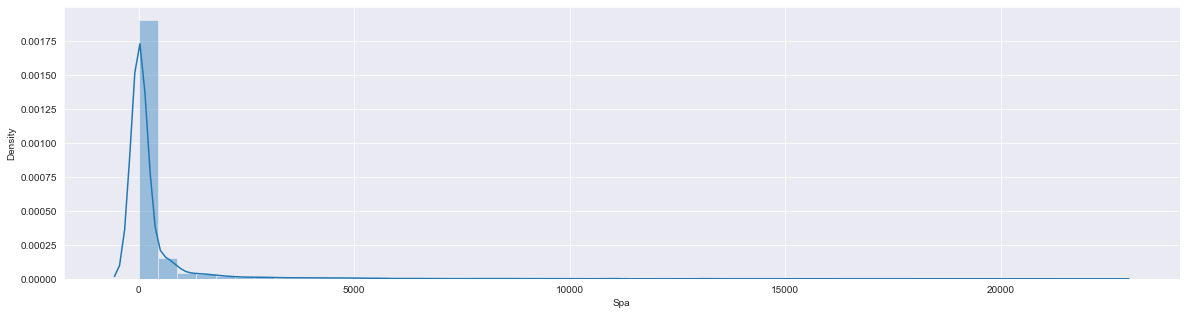

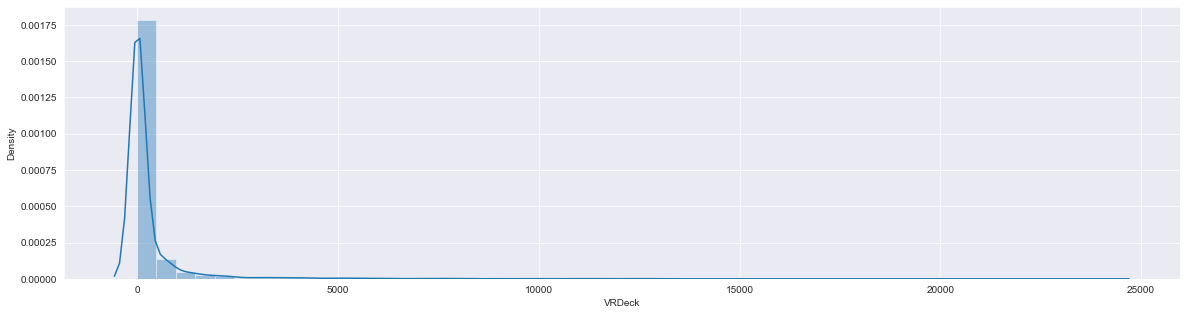

In [13]:
for i,c in enumerate(num_columns):    
    plt.figure(figsize=(20,5))
    sns.set_style('darkgrid')
    sns.distplot(train[c])

Análise:
* Age - há uma distribuição semelhante a uma curva normal, porém com assimetria à direita. A maioria se encontra em torno da média de 28,6 anos. Há menos passageiros de pouca idade (crianças) e mais idade (idosos).
* Nos serviços financeiros, como é de se esperar, não segue uma curva normal, com os gastos se concentrando em uma base menor, que afunila rapidamente.

### 2.3.3 - Correlação

Text(0.5, 1.0, 'Triangle')

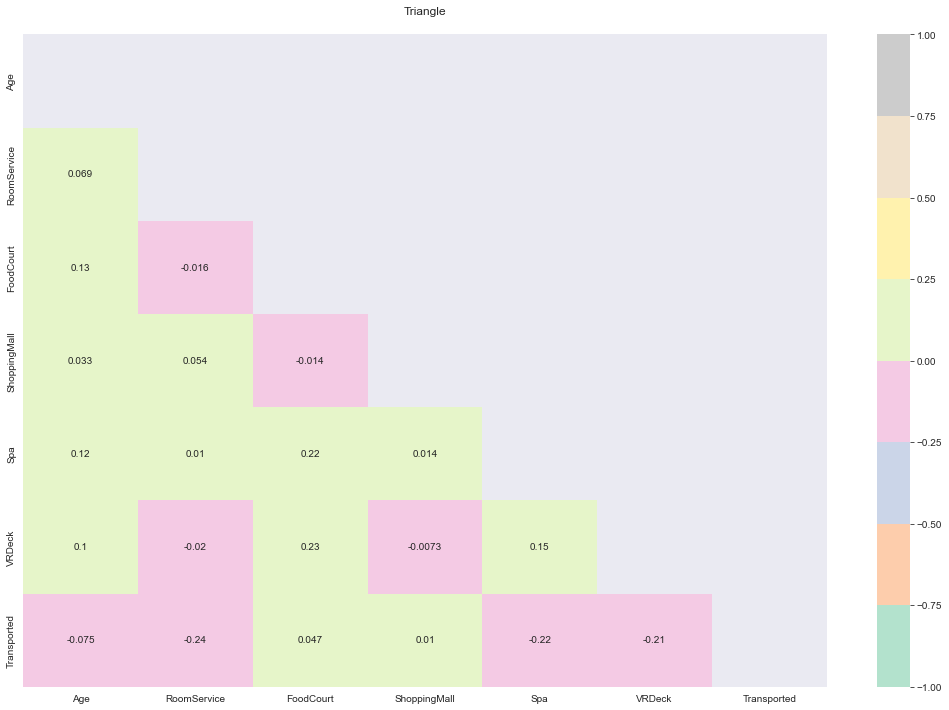

In [14]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

#### Pelo diagrama, podemos observar que não existe uma correlação significativa entre nenhuma das variáveis numéricas

## Etapa 3 - Pré processamento dos dados

### 3.1 - Valores ausentes e duplicados


In [15]:
# Verificando quantidade de valores ausentes nos dados de treino
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

##### Conclusão: Existe um número signiticativo de registros com *NaN*s nos datasets, em diversos atributos.


In [16]:
# Verificando valores duplicados nos dados 
train[train.duplicated() == True]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


##### Conclusão: Também não existem valores duplicados

### 3.2 - Tratamento dos dados

### 3.2.1 - Tratamento dos valores ausentes com SimpleImputer
Como visto anteriormente, há muitos valores ausentes em diversas colunas. 
<br>Por questão didática, preferiu-se não dropar simplesmente essas linhas, o que reduziria muito o recordset de treino e poderia haver perda valiosa de informação.
<br>Ao invés disso, adotou-se a técnica de "preencher" os valores ausentes com o valor mais comum ou a média de cada atributo.

In [17]:
#Tratamento das variáveis numéricas

df_sem_na = train

imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(train[num_columns])
df_sem_na[num_columns] = imputer.transform(train[num_columns])

imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(train[cat_columns])
df_sem_na[cat_columns] = imputer.transform(train[cat_columns])

df_sem_na

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [18]:
df_sem_na.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Após a subtituição, apenas os atributos Cabin e Name continuam com valores ausentes, devido à característica de sua dispersão (tendem a possuir um conjunto muito amplo de valores, sem possuir um valor "comum" significativo).
<br>Como veremos a seguir, isso não será um problema, pois esses atributos não serão utilizados.

### 3.2.2 - Codificação dos atributos categóricos com OneHotEnconder

In [19]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_sem_na[cat_columns]))

# Adding column names to the encoded data set.
OH_cols_train.columns = OH_encoder.get_feature_names(cat_columns)

# One-hot encoding removed index; put it back
OH_cols_train.index = df_sem_na.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = df_sem_na.drop(cat_columns, axis=1)

# Add one-hot encoded columns to numerical features
df_oh = pd.concat([num_X_train, OH_cols_train], axis=1)

### 3.2.3 - Scaling com MinMaxScaler

In [20]:
df_scaled = df_oh.copy()
scaler = MinMaxScaler()
df_scaled[num_columns] = pd.DataFrame(scaler.fit_transform(df_scaled[num_columns]), columns=num_columns)
df_scaled.head()


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0001_01,B/0/P,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,1.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,F/0/S,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,A/0/S,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,Altark Susent,False,1.0,0.0,0.0,0.0,1.0,1.0
3,0003_02,A/0/S,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False,1.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,F/1/S,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True,0.0,0.0,0.0,0.0,1.0,0.0


### 3.3 - DF Final Pré-Processado

In [21]:
#Elimina colunas que não serão utilizadas.
df_preprocessed = df_scaled.drop(columns=['Cabin', 'PassengerId', 'Name'])
df_preprocessed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,1.0,0.0,0.0,0.0,1.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,True,0.0,0.0,0.0,0.0,1.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,False,1.0,0.0,0.0,0.0,1.0,1.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,False,1.0,0.0,0.0,0.0,1.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,True,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066,False,1.0,0.0,0.0,0.0,0.0,1.0
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.0,0.0,1.0,1.0,0.0,0.0
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000,True,0.0,0.0,0.0,0.0,1.0,0.0
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049,False,1.0,0.0,0.0,0.0,0.0,0.0


## Etapa 4 - Desenvolvimento do modelo de machine learning

### 4.1 - Funções de apoio

In [22]:
#funções de apoio
def show_metrics (model, X_train, y_train, X_test, y_test, y_pred):
    
    ret = pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                     "Recall" : recall_score(y_test, y_pred,average='macro'),
                     "F1" : f1_score(y_test, y_pred,average='macro'),
                     "Accuracy" : accuracy_score(y_test, y_pred),
                     "Train_Score" : model.score((X_train),y_train),
                     "Test_Score" : model.score((X_test), y_test)})
    
    print(ret.round(2))

### 4.2 - Definição de Teste e Treino

In [23]:
#Determinando recordsets de treino e teste do modelo
Y=df_preprocessed['Transported'] #Variável Target
X=df_preprocessed.drop('Transported',axis=1) #Variáveis de treino

#recordsets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### 4.3 - Implementação do modelo SVC

### 4.3.1 - Baseline

Inicialmente, vamos executar o modelo com seus valores default, para ser usado como baseline.

In [24]:
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics (model, X_train, y_train, X_test, y_test, y_pred)

Precision      0.76
Recall         0.75
F1             0.75
Accuracy       0.75
Train_Score    0.77
Test_Score     0.75
dtype: float64


### 4.3.2 - Tuning com GridSearch

Utilizando o GridSearch, vamos tentar fazer um tuning e encontrar melhores parâmetros

In [25]:
svct = SVC(random_state=42)

parameters={"kernel": ['rbf', 'sigmoid', 'linear', 'poly'],
            "gamma": ['auto','scale'],
            "C": [0.5, 1, 10, 20, 30, 40, 50]}
svc_tuning=GridSearchCV(estimator=svct, param_grid=parameters)
svc_tuning.fit(X_train, y_train)


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.5, 1, 10, 20, 30, 40, 50],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']})

In [26]:
# verificando melhores parâmetros
svc_tuning.best_params_

{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}

Aplicando os melhores parâmetros ao modelo...

In [27]:
model = SVC(kernel='rbf', gamma='scale', C=30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

show_metrics (model, X_train, y_train, X_test, y_test, y_pred)


Precision      0.77
Recall         0.77
F1             0.77
Accuracy       0.77
Train_Score    0.79
Test_Score     0.77
dtype: float64


Como pode ser visto, houve uma melhora no resultados.

### 4.4 - Análise dos Resultados

              precision    recall  f1-score   support

       False       0.77      0.78      0.77      1289
        True       0.78      0.77      0.77      1319

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



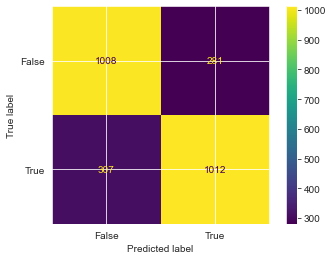

In [28]:
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test,y_pred))


A acurácia geral do modelo ficou em torno de 77%.
<br>Interessante observar que as demais métricas ficaram semelhantes tanto para aqueles que foram tranportados (Tranported = True), quanto para aqueles que não foram (Tranported = False), levando a crer que o modelo não está enviesado em relação a uma das classes.
